# Fázis-visszahatás/visszarúgás

Megtanultuk, hogy a CNOT kapu az ellenkezőjére változtatja a target (második) qubit állapotát, ha a kontroll (első) qubit értéke $|1\rangle$, egyébként változatlanul hagyja a targetet. 
* $|00\rangle$ $\rightarrow$ $|00\rangle$
* $|01\rangle \rightarrow |01\rangle$
* $|10\rangle \rightarrow |11\rangle$
* $|11\rangle \rightarrow |10\rangle$

### Vizsgáljuk most meg, hogy mi történik az alábbi áramkörben!

<img src="https://github.com/gubazoltan/QBronze2023/blob/main/%C3%A1br%C3%A1k/X1_H2_CNOT_circuit.png?raw=true" width="150"/>

(Megj.: feltételezzük, hogy mindkét qubit a $|0\rangle$ kvantumállapotban kerül inicializálásra.)

A CNOT-kapu **bemenete** tehát:

$\left.
\begin{array}{l}
X:|0\rangle \rightarrow |1\rangle \\
H:|0\rangle \rightarrow |+\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)
\end{array} \quad
\right\rbrace
\quad
|1\,+\rangle=|1\rangle \cdot \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)=\frac{1}{\sqrt{2}}(|10\rangle+|11\rangle)$

A CNOT **kimenete**:

$|1\,+\rangle \rightarrow \frac{1}{\sqrt{2}}(|11\rangle+|10\rangle)=|1\rangle \cdot \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)=|1\,+\rangle$

#### Vagyis itt hiába 1 a kontroll qubit értéke, a target állapota mégsem változik meg.
- Megj.: Ha a kontroll értéke nem $|1\rangle$, hanem $|0\rangle$ (azaz nincs X kapu) akkor természetesen nem is várhatnánk, hogy a target állapota megváltozzon 

### Nézzünk egy másik áramkört

<img src="https://github.com/gubazoltan/QBronze2023/blob/main/%C3%A1br%C3%A1k/X1_X2_H2_CNOT_circuit.png?raw=true" width="200"/>

Mivel $H: |1\rangle \rightarrow |-\rangle=\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$

A CNOT-kapu **bemenete** most:

$|1\,-\rangle=\frac{1}{\sqrt{2}}|1\rangle(|0\rangle-|1\rangle)=\frac{1}{\sqrt{2}}(|10\rangle-|11\rangle)$

A CNOT **kimenete** tehát:

$|1\,-\rangle \rightarrow \frac{1}{\sqrt{2}}(|11\rangle-|10\rangle)=-|1\rangle \cdot \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)=-|1\,-\rangle$

- **Itt is hiába 1 a kontroll qubit értéke, a target állapota most sem változik meg**
    - Magyarázat: a CNOT lényegében egy feltételes X-kapu, aminek a $|-\rangle$ (illetve a $|+\rangle$) állapot a "sajátállapota".
    
    
- **Viszont mivel a target állapota $|-\rangle$, a kontroll qubit kap egy fázist $=$ _fázis visszahatás/visszarúgás_**

    - Ez a fázis itt most éppen "nem számít", mert globális fázis, de máskor számíthat

### Nézzük meg, mi történik, ha szuperpozíció a bemenet!


<img src="https://github.com/gubazoltan/QBronze2023/blob/main/%C3%A1br%C3%A1k/H1_X2_H2_CNOT_circuit.png?raw=true" width="200"/>

A CNOT **bemenete** most: 

$|+\,-\rangle=\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)|-\rangle$

A fentiekben láttuk, hogy a **kétfajta bemenetre** a CNOT hatása:

$|0\,-\rangle \rightarrow |0\,-\rangle$

$|1\,-\rangle \rightarrow -|1\,-\rangle$

Tehát a CNOT **kimenete** most:

$|+\,-\rangle \rightarrow \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)|-\rangle=|-\,-\rangle$

#### Vegyük észre, hogy ha ezután még mindkét qubitre hatunk egy-egy H-kapuval, 

<img src="https://github.com/gubazoltan/QBronze2023/blob/main/%C3%A1br%C3%A1k/01_to_11_inverted_CNOT.png?raw=true" width="300"/>

#### akkor a "barrier" előtti $|01\rangle$ kezdőállapotból az $|11\rangle$ végállapot lesz. 

**1. Feladat:** Hozzátok létre a fenti kvantumáramkört és futtassátok le szimulátoron!<br>
A qubitek, $q_1$ és $q_0$, kezdetben legyenek a $|01\rangle$  állapotban, azaz inicializáljátok a <br>
- $q_1$ kvantumbitet a  $|0\rangle$  állapotba <br>
- $q_0$ kvantumbitet pedig az  $|1\rangle$ állapotba.<br>

Ezután alkalmazzatok egy-egy Hadamard kaput mindkét kvantumbiten.<br>
Majd alkalmazzatok egy CNOT kaput úgy, hogy a $q_1$ a kontroll qubit és $q_0$ a target qubit legyen.<br>
Alkalmazzatok ismét egy-egy Hadamard kaput mindkét kvantumbiten.<br>
Végül mérjétek meg a kvantumbiteket!

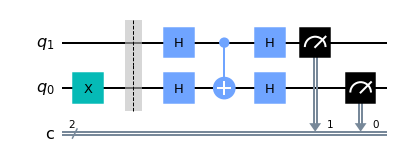

{'11': 100}


In [1]:
from qiskit import QuantumCircuit, execute, Aer

qc = QuantumCircuit(2,2)

qc.x(0)
qc.barrier()

qc.h(0)
qc.h(1)

qc.cx(1,0)

qc.h(0)
qc.h(1)

qc.measure(1,1)
qc.measure(0,0)

display(qc.draw(output='mpl',reverse_bits=True))

job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(qc)
print(counts)

**2. Feladat:** A többi számítási bázis bemenetre ($|00\rangle$, $|10\rangle$, $|11\rangle$) is nézzétek meg a fenti áramkör hatását! Mit tapasztaltok?

### A H-kapukkal "szendvicselt" CNOT tehát fordítva hat

<img src="https://github.com/gubazoltan/QBronze2023/blob/main/%C3%A1br%C3%A1k/reversing_a_CNOT.png?raw=true" width="300"/>

#### azaz a kontroll és target qubit szerepe felcserélődik.

**3. Feladat:** Hozzatok létre egy áramkört 3 qubittel ($q_2$,$q_1$,$q_0$) és inicializáljátok őket a $|001\rangle$ állapotban.<br>
Alkalmazzatok Hadamard kaput az összes kvantumbiten! <br>
Alkalmazzatok 2 db CNOT kaput úgy, hogy a kontroll qubitek a $q_2$ és $q_1$, míg a target mindkét CNOT esetén a $q_0$ legyen. <br>
Ismét alkalmazzatok Hadamard kapukat az összes kvantumbiten, majd mérjétek meg őket! <br>
Értelmezzétek az eredményt!

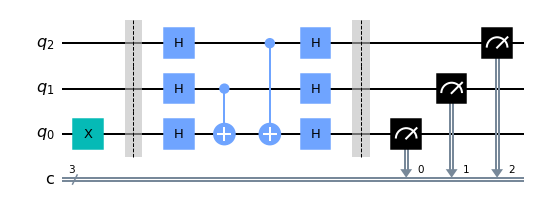

{'111': 100}


In [2]:
from qiskit import QuantumCircuit, execute, Aer

qc = QuantumCircuit(3,3)

qc.x(0)
qc.barrier()

for i in range(3):
    qc.h(i)

for i in range(2):
    qc.cx(i+1,0)

for i in range(3):
    qc.h(i)

qc.barrier()

for i in range(3):
    qc.measure(i,i)

display(qc.draw(output='mpl',reverse_bits=True))

job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(qc)
print(counts)

**4. Feladat:** Nézzétek meg mi történik, ha az egyik, vagy mindkét CNOT kaput kihagyjátok az áramkörből! Mi lesz ezekben az esetekben a mérési eredmény a $q_2$ és $q_1$ qubiteken? 

**5. Feladat:** Végezzétek el a 4. Feladat analízisét nagyobb áramkörben is!